In [7]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, k_means
from sklearn.metrics import silhouette_score
matplotlib.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [8]:
wiz1 = pd.read_csv('wizards1.csv',skiprows = 1)
wiz2 = pd.read_csv('wizards2.csv',skiprows = 1 )
wizards = [wiz1,wiz2] # created list
wizards = pd.concat(wizards) # list into DF
wizards.reset_index()
pd.options.display.max_rows = 999
pd.options.display.max_columns = 40
wizards.head()

,Rk,Player,From,To,Position,Lg,TRB,AST,STL,PTS,WS,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB.1,AST.1,STL.1,BLK,TOV,PF,PTS.1,FG%,2P%,3P%,eFG%,FT%,TS%
0,1,John Wall,2011,2019,PG,NBA,4.3,9.2,1.7,19.0,44.3,573,561,20545,3942,9107,3403,7444,539,1663,2456,3144,330,2153,2483,5282,976,396,2191,1289,10879,0.433,0.457,0.324,0.462,0.781,0.519
1,2,Gilbert Arenas,2004,2011,PG,NBA,4.2,5.7,1.8,25.0,41.5,357,341,14049,2874,6818,2006,4388,868,2430,2314,2860,288,1225,1513,2046,636,96,1239,1161,8930,0.422,0.457,0.357,0.485,0.809,0.553
2,3,Bradley Beal,2013,2020,SG,NBA,4.0,4.0,1.1,21.0,41.5,545,511,18832,4162,9204,2921,5936,1241,3268,1860,2306,450,1719,2169,2171,622,214,1241,1200,11425,0.452,0.492,0.380,0.520,0.807,0.559
3,4,Antawn Jamison,2005,2010,PF,NBA,8.9,1.8,1.1,20.8,41.4,421,419,16307,3298,7380,2652,5579,646,1801,1494,2007,971,2764,3735,773,469,132,658,1059,8736,0.447,0.475,0.359,0.491,0.744,0.529
4,5,Brendan Haywood,2002,2010,C,NBA,6.3,0.6,0.4,7.7,35.8,579,450,14181,1669,3146,1669,3145,0,1,1122,1807,1604,2044,3648,348,254,865,662,1570,4460,0.531,0.531,0.000,0.531,0.621,0.566


In [9]:
wizards.shape

(182, 37)

In [10]:
wizards['Blk'] = wizards['BLK']/ wizards['G']

In [11]:
wizards = wizards.sort_values(by='Rk', ascending=True)
wizards

,Rk,Player,From,To,Position,Lg,TRB,AST,STL,PTS,WS,G,GS,MP,FG,FGA,2P,2PA,3P,3PA,FT,FTA,ORB,DRB,TRB.1,AST.1,STL.1,BLK,TOV,PF,PTS.1,FG%,2P%,3P%,eFG%,FT%,TS%,Blk
0,1,John Wall,2011,2019,PG,NBA,4.3,9.2,1.7,19.0,44.3,573,561,20545,3942,9107,3403,7444,539,1663,2456,3144,330,2153,2483,5282,976,396,2191,1289,10879,0.433,0.457,0.324,0.462,0.781,0.519,0.691099
1,2,Gilbert Arenas,2004,2011,PG,NBA,4.2,5.7,1.8,25.0,41.5,357,341,14049,2874,6818,2006,4388,868,2430,2314,2860,288,1225,1513,2046,636,96,1239,1161,8930,0.422,0.457,0.357,0.485,0.809,0.553,0.268908
2,3,Bradley Beal,2013,2020,SG,NBA,4.0,4.0,1.1,21.0,41.5,545,511,18832,4162,9204,2921,5936,1241,3268,1860,2306,450,1719,2169,2171,622,214,1241,1200,11425,0.452,0.492,0.380,0.520,0.807,0.559,0.392661
3,4,Antawn Jamison,2005,2010,PF,NBA,8.9,1.8,1.1,20.8,41.4,421,419,16307,3298,7380,2652,5579,646,1801,1494,2007,971,2764,3735,773,469,132,658,1059,8736,0.447,0.475,0.359,0.491,0.744,0.529,0.313539
4,5,Brendan Haywood,2002,2010,C,NBA,6.3,0.6,0.4,7.7,35.8,579,450,14181,1669,3146,1669,3145,0,1,1122,1807,1604,2044,3648,348,254,865,662,1570,4460,0.531,0.531,0.000,0.531,0.621,0.566,1.493955
5,6,Marcin Gortat,2014,2018,C,NBA,9.2,1.5,0.5,11.6,35.6,402,400,11995,2007,3613,2006,3606,1,7,639,933,1023,2674,3697,613,217,449,565,973,4654,0.555,0.556,0.143,0.556,0.685,0.578,1.116915
6,7,Otto Porter,2014,2019,SF,NBA,5.0,1.4,1.2,10.7,27.9,384,271,10255,1609,3329,1121,2107,488,1222,415,528,449,1457,1906,553,453,168,295,709,4121,0.483,0.532,0.399,0.557,0.786,0.579,0.437500
7,8,Caron Butler,2006,2010,SF,NBA,6.6,3.5,1.8,19.0,25.4,310,289,11934,2168,4783,1953,4101,215,682,1338,1535,540,1511,2051,1100,563,90,829,877,5889,0.453,0.476,0.315,0.476,0.872,0.539,0.290323
8,9,Larry Hughes,2003,2005,SG,NBA,5.4,3.4,1.9,17.7,15.2,189,178,6556,1214,2836,1047,2316,167,520,755,974,237,779,1016,638,357,68,441,464,3350,0.428,0.452,0.321,0.458,0.775,0.513,0.359788
9,10,Etan Thomas,2002,2009,C,NBA,4.9,0.4,0.3,6.0,14.5,373,73,6681,849,1645,849,1645,0,0,536,893,653,1187,1840,146,123,407,362,839,2234,0.516,0.516,NaN,0.516,0.600,0.548,1.091153


In [12]:
wizards.isnull().sum()

Rk           0
Player       0
From         0
To           0
Position     0
Lg           0
TRB          0
AST          0
STL          0
PTS          0
WS           0
G            0
GS           0
MP           0
FG           0
FGA          0
2P           0
2PA          0
3P           0
3PA          0
FT           0
FTA          0
ORB          0
DRB          0
TRB.1        0
AST.1        0
STL.1        0
BLK          0
TOV          0
PF           0
PTS.1        0
FG%          1
2P%          4
3P%         25
eFG%         1
FT%         12
TS%          1
Blk          0
dtype: int64

In [13]:
wizards = wizards.fillna(0)

In [14]:
wizards.dtypes

Rk            int64
Player       object
From          int64
To            int64
Position     object
Lg           object
TRB         float64
AST         float64
STL         float64
PTS         float64
WS          float64
G             int64
GS            int64
MP            int64
FG            int64
FGA           int64
2P            int64
2PA           int64
3P            int64
3PA           int64
FT            int64
FTA           int64
ORB           int64
DRB           int64
TRB.1         int64
AST.1         int64
STL.1         int64
BLK           int64
TOV           int64
PF            int64
PTS.1         int64
FG%         float64
2P%         float64
3P%         float64
eFG%        float64
FT%         float64
TS%         float64
Blk         float64
dtype: object

In [15]:
wizards.isnull().sum()

Rk          0
Player      0
From        0
To          0
Position    0
Lg          0
TRB         0
AST         0
STL         0
PTS         0
WS          0
G           0
GS          0
MP          0
FG          0
FGA         0
2P          0
2PA         0
3P          0
3PA         0
FT          0
FTA         0
ORB         0
DRB         0
TRB.1       0
AST.1       0
STL.1       0
BLK         0
TOV         0
PF          0
PTS.1       0
FG%         0
2P%         0
3P%         0
eFG%        0
FT%         0
TS%         0
Blk         0
dtype: int64

In [16]:
# Make bar plot
def bar_plot(x, y, title, color):    
    
    # Set up barplot 
    plt.figure(figsize=(9,5))
    g=sns.barplot(x, y, color = color)    
    ax=g

    # Label the graph
    plt.title(title, fontsize = 15)
    plt.xticks(fontsize = 10)

    # Enable bar values
    # Code modified from http://robertmitchellv.com/blog-bar-chart-annotations-pandas-mpl.html
    # create a list to collect the plt.patches data
    totals = []

    # find the values and append to list
    for p in ax.patches:
        totals.append(p.get_width())

    # set individual bar lables using above list
    total = sum(totals)

    # set individual bar lables using above list
    for p in ax.patches:
        # get_width pulls left or right; get_y pushes up or down
        ax.text(p.get_width()+.3, p.get_y()+.38, \
                int(p.get_width()), fontsize=10)

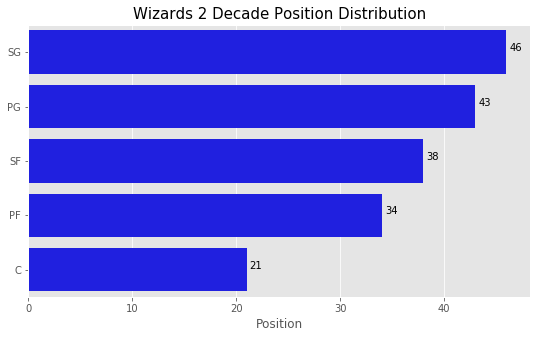

In [17]:
positions = bar_plot(wizards[
    'Position'].value_counts(), wizards[
    'Position'].value_counts().index, "Wizards 2 Decade Position Distribution",color ='b')

In [18]:
def get_position_averages(col):
    positions = PG, SG, SF, PF, C
    totals = []
    for position in positions:
        mean = position[col].mean()
        median = position[col].median()
        totals.append([mean, median])
    position_df = pd.DataFrame(totals, index=['PG', 'SG', 'SF', 'PF', 'C'])
    position_df.columns = ['mean_values','median_values']
    return position_df

In [19]:
features = ['G', 'GS', 'MP', 'FG%', '3P%', '2P%', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'PTS']

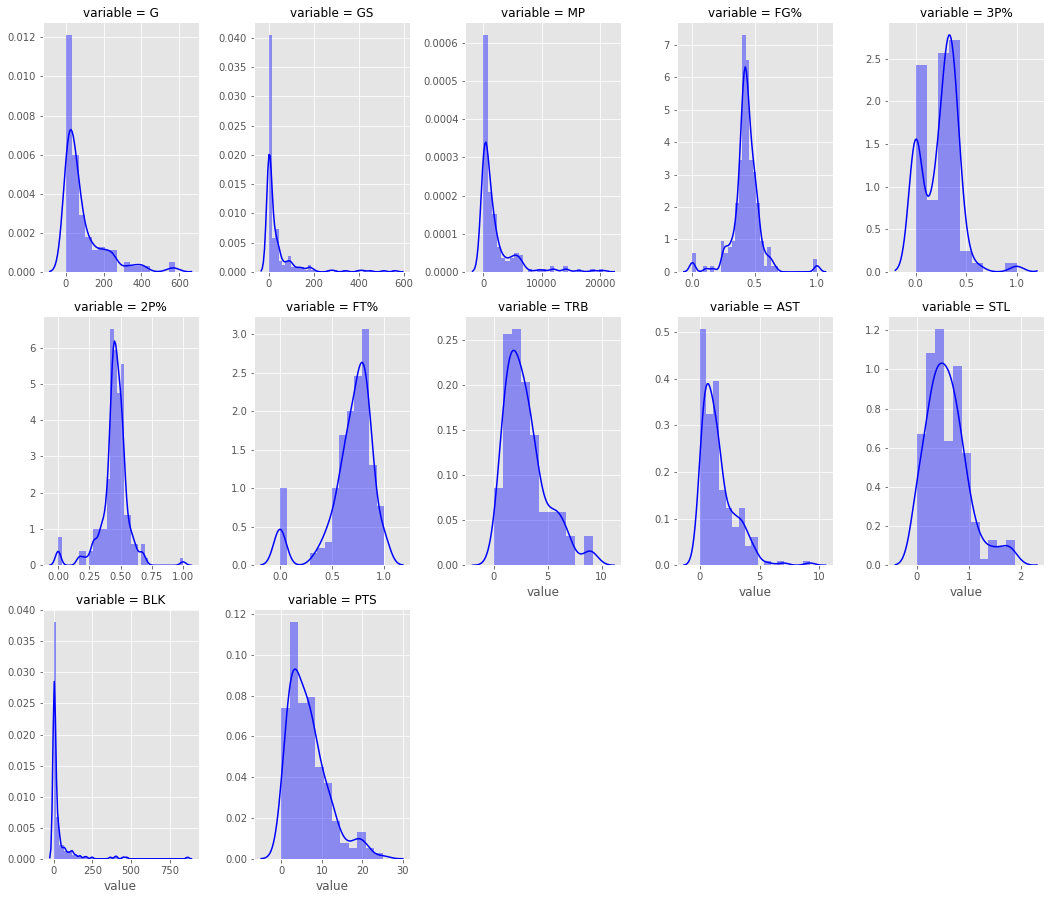

In [20]:
dfm = pd.melt(wizards, value_vars=features)
gf = sns.FacetGrid(dfm, col_wrap=5, col='variable', height = 4.2, aspect = 0.7 ,sharex=False, sharey=False)
gf = gf.map(sns.distplot, 'value', color='b');

In [21]:
PG = wizards[wizards['Position']=='PG']
SG = wizards[wizards['Position']=='SG']
SF = wizards[wizards['Position']=='SF']
PF = wizards[wizards['Position']=='PF']
C = wizards[wizards['Position']=='C']


In [22]:
get_position_averages('PTS')

,mean_values,median_values
PG,6.972093,6.20
SG,6.265217,4.20
SF,6.602632,6.25
PF,7.173529,5.95
C,5.861905,6.00


In [23]:
get_position_averages('FG%')

,mean_values,median_values
PG,0.404070,0.4190
SG,0.387196,0.3975
SF,0.431184,0.4300
PF,0.467941,0.4695
C,0.517190,0.5000


In [24]:
get_position_averages('TRB')

,mean_values,median_values
PG,2.011628,1.90
SG,2.263043,1.85
SF,3.042105,3.10
PF,4.005882,3.90
C,4.585714,4.50


In [25]:
get_position_averages('STL')

,mean_values,median_values
PG,0.683721,0.60
SG,0.600000,0.50
SF,0.578947,0.60
PF,0.520588,0.55
C,0.461905,0.40


In [26]:
get_position_averages('BLK')

,mean_values,median_values
PG,17.906977,5.0
SG,17.826087,3.5
SF,29.342105,8.5
PF,38.235294,19.0
C,165.714286,80.0


In [27]:
get_position_averages('AST')

,mean_values,median_values
PG,2.909302,3.00
SG,1.423913,1.15
SF,1.142105,0.95
PF,1.055882,0.80
C,0.719048,0.50


In [28]:
get_position_averages('3P%')

,mean_values,median_values
PG,0.328302,0.3500
SG,0.264630,0.3075
SF,0.251079,0.2990
PF,0.195000,0.2295
C,0.116190,0.0000


In [29]:
get_position_averages('FT%')

,mean_values,median_values
PG,0.674209,0.7820
SG,0.686130,0.7385
SF,0.721079,0.7335
PF,0.685735,0.7560
C,0.592190,0.6040


In [30]:
# Small Forward highest average performance categories
SF_features = ['PTS', 'TRB']

# Center highest average performance categories
C_features = ['Blk', 'FG%', 'TRB']

# Power Forward highest average performance categories
PF_features = ['TRB','FG%', 'PTS']

# Shooting Guard highest average performance categories
SG_features = ['AST', 'PTS', 'STL']

# Point Guard highest average performance categories
PG_features = ['AST', 'PTS', 'STL']

In [31]:
def get_cluster_scores(X_scaled):
    scores = []
    for k in range(2,15):
        cl = KMeans(n_clusters=k, random_state=42)
        cl.fit(X_scaled)
        inertia = cl.inertia_
        sil = silhouette_score(X_scaled, cl.labels_)
        scores.append([k, inertia, sil])
    score_df = pd.DataFrame(scores)
    score_df.columns = ['k', 'inertia', 'silhouette']
    return score_df

In [32]:
def plot_cluster_scores():
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].plot(get_cluster_scores(X_scaled).k, get_cluster_scores(X_scaled).inertia)
    axes[0].set_title('Inertia over k')
    axes[1].plot(get_cluster_scores(X_scaled).k, get_cluster_scores(X_scaled).silhouette);
    axes[1].set_title('Silhouette Score over k')

In [33]:
def get_centroids(cols, sort_by):   
    centroids = pd.DataFrame(
        ss.inverse_transform(kmeans.cluster_centers_),
        columns = cols)
    centroids['mean'] = centroids.mean(numeric_only=True, axis=1)
    centroids['median'] = centroids.median(numeric_only=True, axis=1)
    return centroids.sort_values(sort_by, ascending=False)

In [34]:
X = PF[PF_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [35]:
get_cluster_scores(X_scaled).sort_values('inertia', ascending=True).head(10)

,k,inertia,silhouette
12,14,5.095747,0.320195
11,13,5.809122,0.326193
10,12,6.604382,0.334347
9,11,7.468005,0.350044
8,10,8.662776,0.336154
7,9,10.627810,0.300809
6,8,11.821615,0.329698
5,7,14.825615,0.338093
4,6,18.152667,0.311976
3,5,22.870947,0.310619


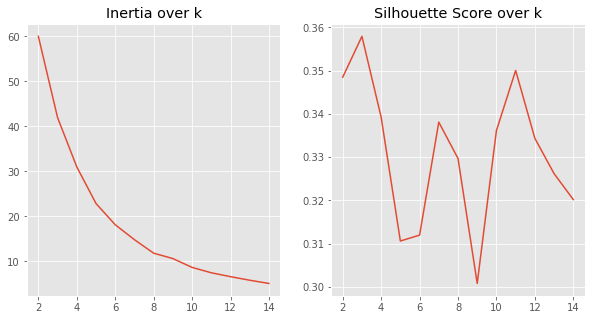

In [36]:
plot_cluster_scores()

In [37]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [38]:
cluster_nums = kmeans.labels_

In [39]:
PF = PF.copy()

PF.loc[:,'clusters'] = cluster_nums

In [40]:
PF_features

['TRB', 'FG%', 'PTS']

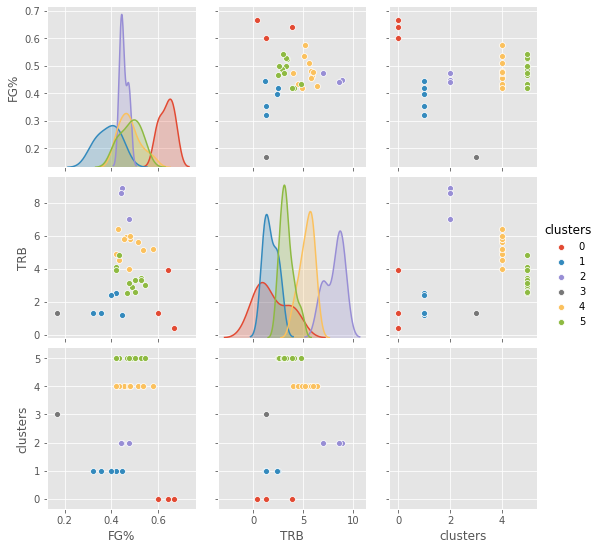

In [41]:
sns.pairplot(PF, vars=['FG%', 'TRB', 'clusters'], hue='clusters');


In [42]:
PF[['Player', 'G','PTS', 'clusters']].sort_values('PTS', ascending=False).head(10)

,Player,G,PTS,clusters
3,Antawn Jamison,421,20.8,2
65,Juwan Howard,54,18.2,2
48,Dāvis Bertāns,54,15.4,4
92,Bobby Portis,28,14.3,2
75,Rui Hachimura,41,13.4,4
20,Markieff Morris,210,12.5,4
46,Jeff Green,77,12.3,4
11,Nenê Hilário,249,11.8,4
71,Rashard Lewis,60,9.7,4
73,Moritz Wagner,37,9.5,4


In [43]:
PF_centroids = get_centroids(PF_features, 'median')

In [44]:
PF_centroids

,TRB,FG%,PTS,mean,median
2,8.166667,0.453667,17.766667,8.795667,8.481167
4,5.381818,0.477364,10.209091,5.356091,5.368955
5,3.354545,0.480818,5.254545,3.029970,3.192258
1,1.740000,0.387000,2.880000,1.669000,1.704500
0,1.866667,0.635667,1.800000,1.434111,1.617056
3,1.300000,0.167000,0.700000,0.722333,0.711167


In [45]:
PF['ranking'] = PF['clusters'].map({2:1, 4:2, 5:3, 1:4, 0:5, 3:6,})



In [46]:
PF[['Player', 'G', 'PTS', 'ranking', 'From','To']].sort_values('ranking')

,Player,G,PTS,ranking,From,To
3,Antawn Jamison,421,20.8,1,2005,2010
92,Bobby Portis,28,14.3,1,2019,2019
65,Juwan Howard,54,18.2,1,2001,2001
75,Rui Hachimura,41,13.4,2,2020,2020
73,Moritz Wagner,37,9.5,2,2020,2020
48,Dāvis Bertāns,54,15.4,2,2020,2020
46,Jeff Green,77,12.3,2,2019,2019
40,Kris Humphries,92,7.5,2,2015,2016
71,Rashard Lewis,60,9.7,2,2011,2012
35,Popeye Jones,124,5.8,2,2001,2002


In [47]:
X = C[C_features]
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

In [48]:
get_cluster_scores(X_scaled).sort_values('inertia', ascending=True).head(10)

,k,inertia,silhouette
12,14,0.998254,0.248858
11,13,1.497189,0.246171
10,12,1.752944,0.287509
9,11,2.343124,0.279329
8,10,3.009911,0.306420
7,9,3.956172,0.300760
6,8,5.320733,0.259290
5,7,6.603752,0.312562
4,6,7.754933,0.325842
3,5,9.760216,0.334772


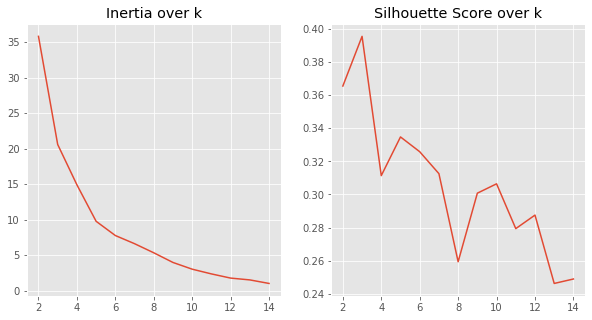

In [49]:
plot_cluster_scores()

In [90]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [91]:
cluster_nums = kmeans.labels_

In [92]:
C = C.copy()

C.loc[:,'clusters'] = cluster_nums

In [93]:
C_features

['Blk', 'FG%', 'TRB']

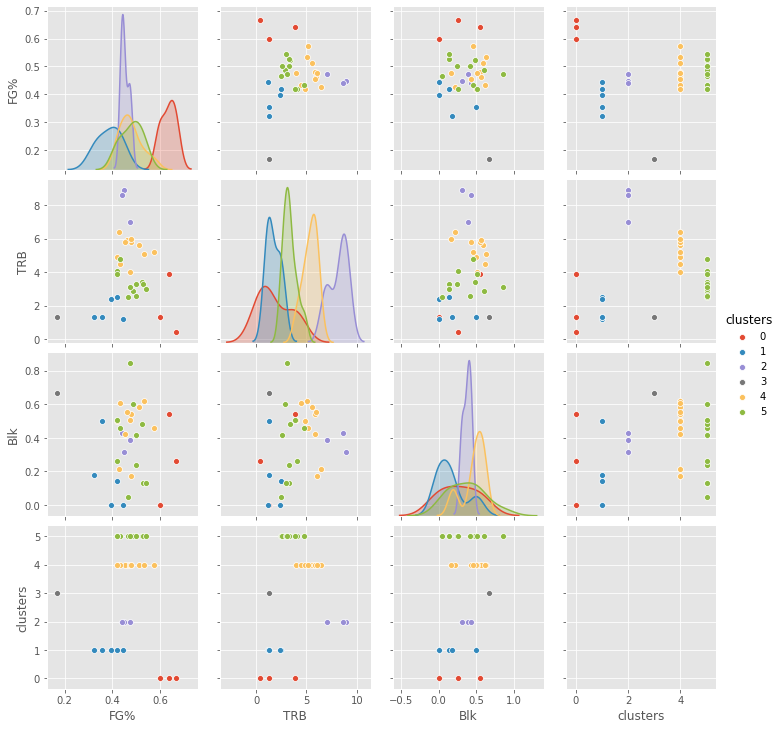

In [94]:
sns.pairplot(PF, vars=['FG%', 'TRB', 'Blk','clusters'], hue='clusters');


In [95]:
C[['Player','G','PTS','Blk','clusters']].sort_values('PTS', ascending=False).head(10)

,Player,G,PTS,Blk,clusters
99,Dwight Howard,9,12.8,0.444444,3
5,Marcin Gortat,402,11.6,1.116915,0
23,Thomas Bryant,110,11.1,0.909091,3
17,Andray Blatche,409,9.9,0.894866,3
41,Emeka Okafor,79,9.7,0.974684,0
15,JaVale McGee,255,8.5,1.843137,0
4,Brendan Haywood,579,7.7,1.493955,0
22,Kwame Brown,253,7.7,0.683794,3
31,Jahidi White,156,6.6,1.275641,0
9,Etan Thomas,373,6.0,1.091153,3


In [96]:
C_centroids = get_centroids(C_features, 'median')

In [97]:
C_centroids

,Blk,FG%,TRB,mean,median
0,1.340866,0.519800,7.400000,3.086889,2.213878
3,0.780055,0.519875,5.337500,2.212477,1.496266
2,0.750000,1.000000,3.000000,1.583333,1.291667
1,0.246139,0.443286,1.942857,0.877427,0.660356
